In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("C:\\Users\\Syed Abdullah Jelani\\Desktop\\Safe-Tech")
train20 = pd.read_csv('1 - 20 Percent Training Set.csv', index_col=False, header=0);
test = pd.read_csv('Test - KDDTest.csv', index_col=False, header=0);

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 42 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [5]:
train20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [6]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [7]:
train20.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
#ONE-HOT ENCODING OF CATEGORICAL VARIABLES
train20_target = train20["target"]
test_target = test["target"]
train20 = train20.drop("target" , axis =1)
test = test.drop('target', axis =1)
train20 = pd.get_dummies(train20)
test = pd.get_dummies(test)


print('Training Features shape: ', train20.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (25192, 118)
Testing Features shape:  (22543, 115)


In [9]:
#aligning train and test sets to have same features
train20['target'] = train20_target
test['target'] = test_target


train20, test = train20.align(test, join = 'inner', axis = 1)


print('Training Features shape: ', train20.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (25192, 116)
Testing Features shape:  (22543, 116)


In [10]:
train20_target

0             normal
1             normal
2            neptune
3             normal
4             normal
5            neptune
6            neptune
7            neptune
8            neptune
9            neptune
10           neptune
11           neptune
12            normal
13       warezclient
14           neptune
15           neptune
16            normal
17           ipsweep
18            normal
19            normal
20           neptune
21           neptune
22            normal
23            normal
24           neptune
25            normal
26           neptune
27            normal
28            normal
29            normal
            ...     
25162         normal
25163        neptune
25164         normal
25165         normal
25166        neptune
25167         normal
25168         normal
25169         normal
25170        neptune
25171        neptune
25172        neptune
25173         normal
25174        neptune
25175         normal
25176         normal
25177         normal
25178        

In [11]:
test_target

0             neptune
1             neptune
2              normal
3               saint
4               mscan
5              normal
6              normal
7        guess_passwd
8              normal
9        guess_passwd
10              mscan
11             normal
12            neptune
13            neptune
14             normal
15             normal
16             normal
17             normal
18             normal
19            neptune
20            neptune
21              mscan
22             normal
23             normal
24            neptune
25            neptune
26             normal
27             normal
28              smurf
29             normal
             ...     
22513          normal
22514         apache2
22515          normal
22516    processtable
22517          normal
22518    processtable
22519           satan
22520           satan
22521            back
22522          normal
22523         rootkit
22524         apache2
22525          normal
22526          normal
22527     

In [12]:
test =test.drop("target",axis=1)
train20 = train20.drop("target",axis=1)

In [13]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train20,train20_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logisticRegr.predict(test[0:10])


array(['neptune', 'neptune', 'normal', 'ipsweep', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal'], dtype=object)

In [15]:
logisticRegr.score(test, test_target)


0.6917446657499002

In [16]:
# ^ Logistic regression without any data manipulation except one-hot and label encoding
#0.69 score

In [17]:

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [20]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train20, train20_target)
    y_pred = clf.predict(test)
    f1_scores[clf_name] = f1_score(y_pred, test_target,average="weighted")

mnb


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gnb
mlp1
mlp2
ada


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


dtc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


rfc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gbc
lr


In [21]:
f1_scores

{'ada': 0.7573212302945069,
 'dtc': 0.8073602608942091,
 'gbc': 0.8203724365747385,
 'gnb': 0.3654325976084955,
 'lr': 0.7520218317949396,
 'mlp1': 0.7738521174019363,
 'mlp2': 0.7531583321725379,
 'mnb': 0.30206130759982264,
 'rfc': 0.8238568493191202}

In [22]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test, test_target)
accuracy


{'ada': 0.6256487601472741,
 'dtc': 0.7197799760457791,
 'gbc': 0.7222641174644013,
 'gnb': 0.32023244466131395,
 'lr': 0.6362507208446081,
 'mlp1': 0.6818968194117908,
 'mlp2': 0.6649514261633322,
 'mnb': 0.2901122299605199,
 'rfc': 0.7226633544781085}

In [23]:
#CONCLUSION : ACCURACY DECREASES WITH LABEL-ENCODED TARGETS( PROBABLY DUE TO WEIGHT ASSIGNED??)
#RFC IS THE WAY TO GO!!!


In [24]:
#EXPLORATORY DATA ANALYSIS

In [25]:
train20_target_div =train20_target


In [26]:
#create only normal and attack classes!!!

train20_target_div =train20_target_div.replace(("neptune","warezclient","ipsweep","satan",'portsweep', 'teardrop', 'nmap', 'smurf',
       'pod', 'back', 'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy'),"attack")

In [27]:
#attack to normal ratio
print("No. of attacks : ", list(train20_target_div).count("attack"))
print("No. of normal : ", list(train20_target_div).count("normal"))
print("A/N : ", list(train20_target_div).count("attack") / list(train20_target_div).count("normal"))

No. of attacks :  11743
No. of normal :  13449
A/N :  0.8731504201055841


Text(0,0.5,'Frequency')

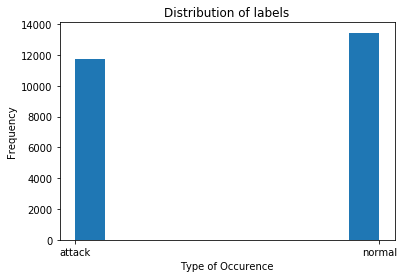

In [28]:
plt.hist(train20_target_div)
plt.title("Distribution of labels")
plt.xlabel("Type of Occurence")
plt.ylabel("Frequency")

In [29]:
#2 values make no contextual sense
train20.su_attempted = train20.su_attempted.replace(2,0)

In [30]:
train20_div = train20
train20_div["target"] = train20_target_div


In [31]:
train20_div['target'] = train20_div['target'].replace("normal",0)
train20_div['target'] = train20_div['target'].replace("attack",1)

In [47]:
test_div = test
test_div['target'] = test_target.replace("normal",0)
test_div['target'] = test_target.replace("attack",1)

In [48]:
train20_div.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Find correlations with the target and sort
correlations = train20_div.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 srv_rerror_rate             0.256152
dst_host_rerror_rate        0.256312
rerror_rate                 0.256858
dst_host_srv_rerror_rate    0.256999
dst_host_count              0.368828
service_private             0.447088
count                       0.578790
srv_serror_rate             0.647817
serror_rate                 0.649952
flag_S0                     0.650227
dst_host_serror_rate        0.651050
dst_host_srv_serror_rate    0.653759
target                      1.000000
num_outbound_cmds                NaN
is_host_login                    NaN
Name: target, dtype: float64

Most Negative Correlations:
 flag_SF                  -0.756731
same_srv_rate            -0.749237
dst_host_srv_count       -0.719292
dst_host_same_srv_rate   -0.692212
logged_in                -0.688084
service_http             -0.562565
service_domain_u         -0.259833
protocol_type_udp        -0.220651
service_smtp             -0.210676
srv_diff_host_rate       -0.120649
service

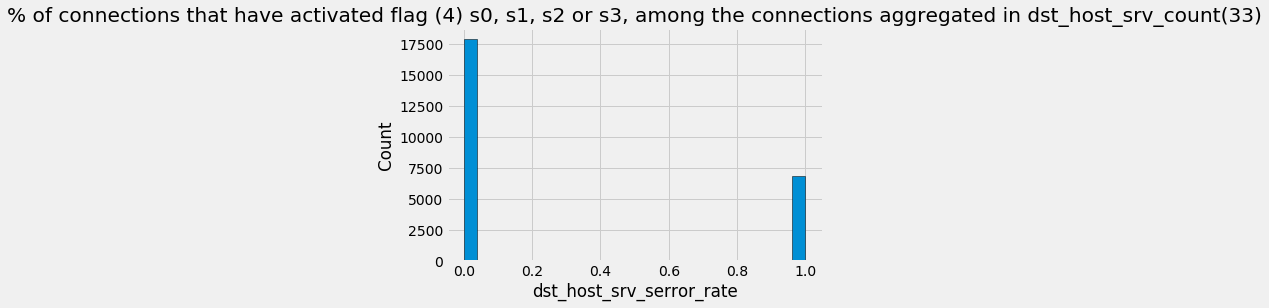

In [50]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train20_div['dst_host_srv_serror_rate'] , edgecolor = 'k', bins = 25)
plt.title('% of connections that have activated flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_count(33)'); plt.xlabel('dst_host_srv_serror_rate'); plt.ylabel('Count');


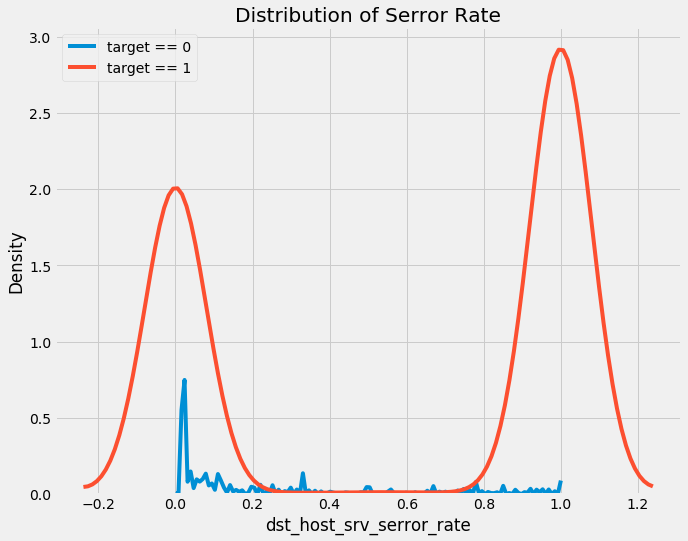

In [51]:
plt.figure(figsize = (10, 8))

# KDE plot of normal occurence
sns.kdeplot(train20_div.loc[train20_div['target'] == 0, 'dst_host_srv_serror_rate'] , label = 'target == 0')

# KDE plot of attacks
sns.kdeplot(train20_div.loc[train20_div['target'] == 1, 'dst_host_srv_serror_rate'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('dst_host_srv_serror_rate'); plt.ylabel('Density'); plt.title('Distribution of Serror Rate');

In [52]:
train20_div["dst_host_srv_serror_rate"].unique()

array([0.  , 1.  , 0.01, 0.02, 0.88, 0.09, 0.48, 0.08, 0.97, 0.06, 0.05,
       0.25, 0.14, 0.1 , 0.33, 0.96, 0.75, 0.92, 0.67, 0.36, 0.5 , 0.2 ,
       0.93, 0.61, 0.13, 0.8 , 0.98, 0.04, 0.07, 0.3 , 0.95, 0.03, 0.66,
       0.11, 0.94, 0.7 , 0.85, 0.15, 0.41, 0.56, 0.78, 0.69, 0.6 , 0.76,
       0.89, 0.26, 0.32, 0.79, 0.12, 0.16, 0.91, 0.22, 0.29, 0.73, 0.49,
       0.82, 0.4 , 0.65, 0.81, 0.84, 0.28, 0.19, 0.87, 0.42, 0.18, 0.77,
       0.44, 0.59, 0.45, 0.71, 0.35, 0.17, 0.9 , 0.27, 0.39, 0.23, 0.62,
       0.86, 0.55, 0.31, 0.83, 0.57, 0.72, 0.37, 0.74, 0.38, 0.34, 0.24])

In [53]:
#anything above serror rate = 0.5 is almost certainly an attack
a=0
b=-1
dummy =[]
for i in train20_div["target"]:
    b+=1
    if train20_div["target"][b]==1 and train20_div["dst_host_srv_serror_rate"][b] ==1:
        a+=1
        dummy.append(train20_div["dst_host_srv_serror_rate"][b])
print(a)

6855


In [54]:
print("Percentage of Attacks with dst_serror_rate >= 0.5 : ", a/((train20_div.target ==1).value_counts()[True]) * 100)

Percentage of Attacks with dst_serror_rate >= 0.5 :  58.37520224814783


In [55]:
#new feature based on attack ==1 and dst_host_srv_serror_rate >=0.01

serror_rate_attack_1 = dummy
print(len(serror_rate_attack_1))
diff = len(train20_div["dst_host_srv_serror_rate"]) - len(serror_rate_attack_1)
print(diff)



6855
18337


In [56]:
dummy2 = [np.mean(serror_rate_attack_1) for i in range(0,diff)] 
len(serror_rate_attack_1)

6855

In [57]:
#Further exploratory data analysis requires interaction between features be seen
#Taking three most negatively and positively correlated features and seeing correlations b/w them
ext_data = train20[['target','flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate', 'flag_SF','same_srv_rate','dst_host_srv_count' ]]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,target,flag_S0,dst_host_serror_rate,dst_host_srv_serror_rate,flag_SF,same_srv_rate,dst_host_srv_count
target,1.000000,0.650227,0.651050,0.653759,-0.756731,-0.749237,-0.719292
flag_S0,0.650227,1.000000,0.974830,0.980092,-0.751529,-0.766818,-0.552984
dst_host_serror_rate,0.651050,0.974830,1.000000,0.984706,-0.741698,-0.763522,-0.572560
dst_host_srv_serror_rate,0.653759,0.980092,0.984706,1.000000,-0.745144,-0.767487,-0.567893
flag_SF,-0.756731,-0.751529,-0.741698,-0.745144,1.000000,0.827456,0.669513
same_srv_rate,-0.749237,-0.766818,-0.763522,-0.767487,0.827456,1.000000,0.702810
dst_host_srv_count,-0.719292,-0.552984,-0.572560,-0.567893,0.669513,0.702810,1.000000


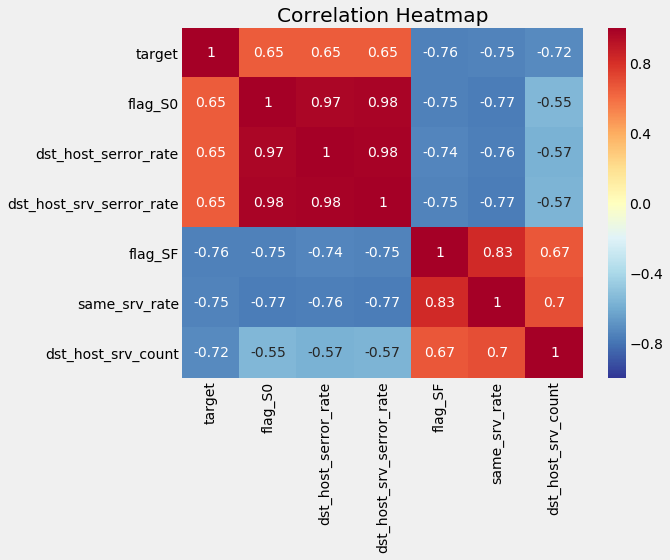

In [58]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

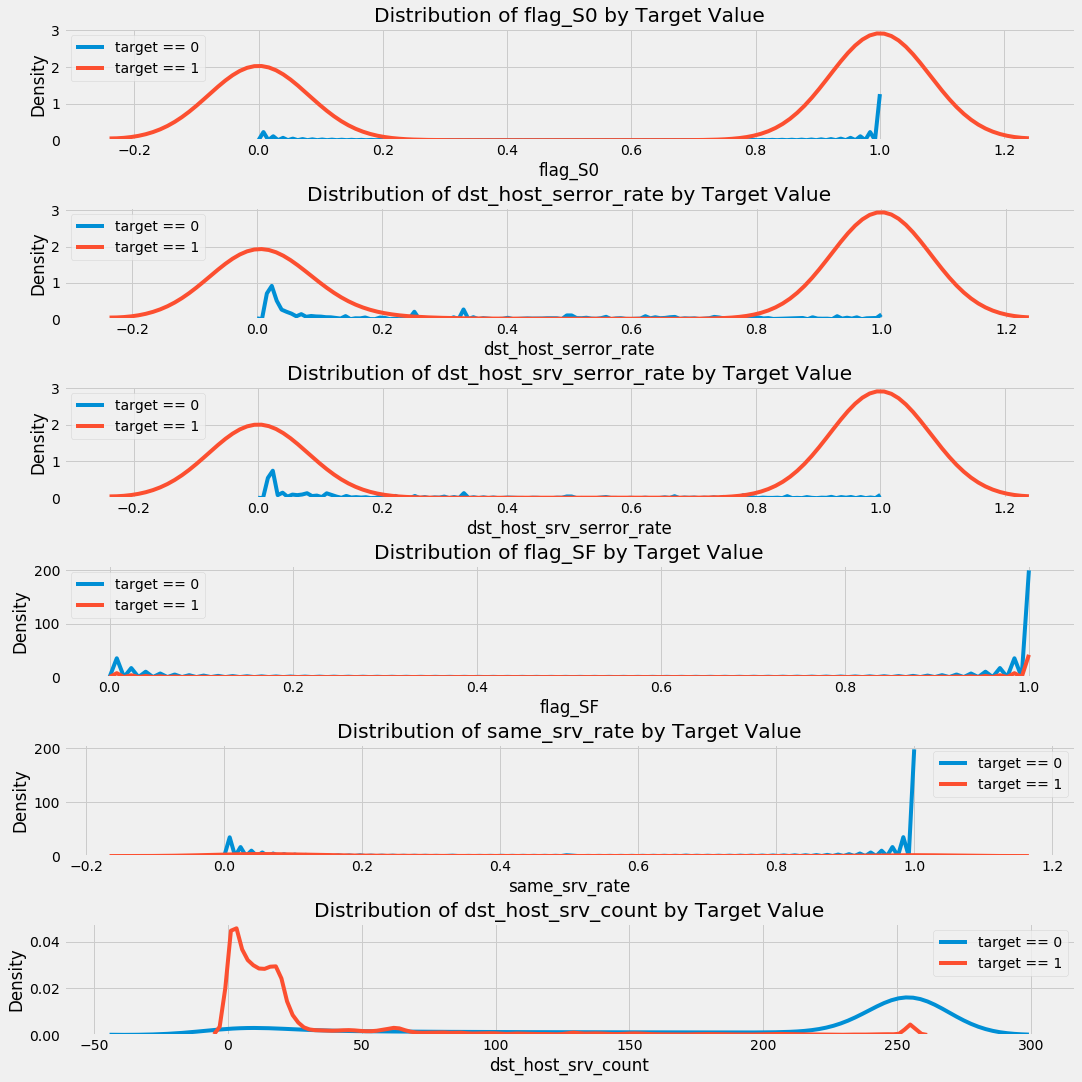

In [59]:
plt.figure(figsize = (15,15))

# iterate through the sources
for i, source in enumerate(['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate', 'flag_SF','same_srv_rate','dst_host_srv_count' ]):
    
    # create a new subplot for each source
    plt.subplot(6, 1, i+1)
    # plot repaid loans
    sns.kdeplot(train20_div.loc[train20_div['target'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train20_div.loc[train20_div['target'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(pad =0.44)


In [60]:
#INTERACTION TERMS 
#POLYNOMIAL FEATURES
#WHATEVER IS DONE TO TRAIN SET NEEDS TO BE DONE TO TEST SET ASWELL
#COULD HAVE USED PAIRS PLOT BUT LETS LEAVE THAT FOR NOW

poly_features = train20_div[['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate','flag_SF','same_srv_rate','target']]
poly_features_test =test_div[['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate','flag_SF','same_srv_rate']]


poly_target = poly_features['target']
poly_features = poly_features.drop(columns = ['target'])


from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)



In [61]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (25192, 21)


In [62]:
poly_transformer.get_feature_names(input_features = ['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate','flag_SF','same_srv_rate'])[:15]

['1',
 'flag_S0',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'flag_SF',
 'same_srv_rate',
 'flag_S0^2',
 'flag_S0 dst_host_serror_rate',
 'flag_S0 dst_host_srv_serror_rate',
 'flag_S0 flag_SF',
 'flag_S0 same_srv_rate',
 'dst_host_serror_rate^2',
 'dst_host_serror_rate dst_host_srv_serror_rate',
 'dst_host_serror_rate flag_SF',
 'dst_host_serror_rate same_srv_rate']

In [63]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate','flag_SF','same_srv_rate']))

# Add in the target
poly_features['target'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['target'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

flag_SF^2                                -0.756731
flag_SF                                  -0.756731
same_srv_rate                            -0.749237
same_srv_rate^2                          -0.745298
flag_SF same_srv_rate                    -0.744432
dst_host_serror_rate flag_SF             -0.078618
dst_host_srv_serror_rate flag_SF         -0.065146
dst_host_serror_rate same_srv_rate        0.231789
flag_S0 same_srv_rate                     0.270357
dst_host_srv_serror_rate same_srv_rate    0.278935
Name: target, dtype: float64
flag_S0 dst_host_serror_rate        0.656616
flag_S0 dst_host_srv_serror_rate    0.657466
target                              1.000000
1                                        NaN
flag_S0 flag_SF                          NaN
Name: target, dtype: float64


In [64]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['flag_S0','dst_host_serror_rate','dst_host_srv_serror_rate','flag_SF','same_srv_rate']))

In [65]:
train20_div['index_col'] = train20_div.index
test_div['index_col'] = test_div.index

In [66]:
# Merge polynomial features into training dataframe
poly_features['index_col'] = train20_div['index_col']
train20_div_poly = train20_div.merge(poly_features, on = 'index_col', how = 'left')


In [67]:
# Merge polnomial features into testing dataframe
poly_features_test['index_col'] = test['index_col']
test_poly = test_div.merge(poly_features_test, on = 'index_col', how = 'left')

# Align the dataframes
train20_div_poly, test_poly = train20_div_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train20_div_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (25192, 137)
Testing data with polynomial features shape:   (22543, 137)


In [68]:
train20_div_target = train20_div.target
test_div = test_div.drop('target',axis=1)

In [69]:

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [70]:
#targets are original here
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train20_div_poly, train20_target)
    y_pred = clf.predict(test_poly)
    f1_scores[clf_name] = f1_score(y_pred, test_target,average="weighted")

mnb


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gnb
mlp1
mlp2
ada


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


dtc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


rfc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gbc
lr


In [71]:
f1_scores

{'ada': 0.7573212302945069,
 'dtc': 0.8078069694683315,
 'gbc': 0.8199223840182305,
 'gnb': 0.3662363302049329,
 'lr': 0.7549421836411755,
 'mlp1': 0.7489242790113695,
 'mlp2': 0.7016212307652996,
 'mnb': 0.260257396897179,
 'rfc': 0.8247441595226787}

In [72]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test_poly, test_target)
accuracy

{'ada': 0.6256487601472741,
 'dtc': 0.7248813378875926,
 'gbc': 0.7215987224415561,
 'gnb': 0.3216963137115734,
 'lr': 0.635008650135297,
 'mlp1': 0.6571441245619483,
 'mlp2': 0.621478951337444,
 'mnb': 0.2597258572505878,
 'rfc': 0.7222197577962117}

In [ ]:
#targets are worded as either attack or normal
#f1_scores = dict()
#for clf_name in clfs:
#    print(clf_name)
#    clf = clfs[clf_name]
#    clf.fit(train20_div_poly, train20_div_target_word)
#    y_pred = clf.predict(test_poly)
#    f1_scores[clf_name] = f1_score(y_pred, test_target,average="weighted")

In [ ]:
f1_scores

In [ ]:
#f1_scores are higher with original targets
#Both accuracy and f1 scores have generally decreased with new polynomial features, though on average are nearly the same

In [74]:
#Dimensionality reduction will be used to reduce redundant features
#LETS DETERMINE IMPORTANT FEATURES# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [75]:
# Train on the training data
random_forest.fit(train20_div_poly, train20_div_target)
features = list(train20_div_poly.columns)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test_poly)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [76]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

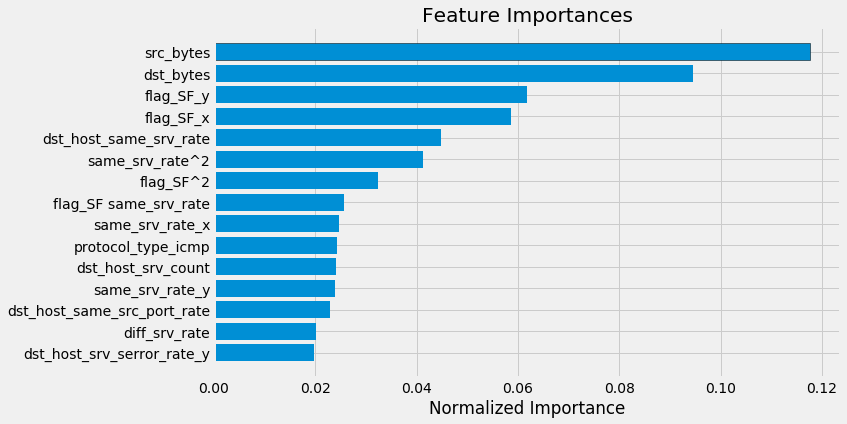

In [77]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [78]:
selected_important_features = feature_importances_sorted[:20]

In [79]:
#creatre new dataframe with only top 20 important features
selected_list=[x for x in selected_important_features.feature]
train_selected = pd.DataFrame(train20_div_poly,columns = selected_list)
test_selected = pd.DataFrame(test_poly,columns = selected_list)

In [80]:

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [81]:
#original
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train_selected, train20_target)
    y_pred = clf.predict(test_selected)
    f1_scores[clf_name] = f1_score(y_pred, test_target,average="weighted")

mnb


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gnb
mlp1
mlp2
ada


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


dtc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


rfc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gbc
lr


In [82]:
f1_scores

{'ada': 0.6191880265465329,
 'dtc': 0.815546681216287,
 'gbc': 0.8161386769237551,
 'gnb': 0.38007565566887386,
 'lr': 0.7682649420211649,
 'mlp1': 0.7642625273067838,
 'mlp2': 0.6493831543141314,
 'mnb': 0.2724277477070997,
 'rfc': 0.8239756181843311}

In [83]:
f1_scores

{'ada': 0.6191880265465329,
 'dtc': 0.815546681216287,
 'gbc': 0.8161386769237551,
 'gnb': 0.38007565566887386,
 'lr': 0.7682649420211649,
 'mlp1': 0.7642625273067838,
 'mlp2': 0.6493831543141314,
 'mnb': 0.2724277477070997,
 'rfc': 0.8239756181843311}

In [84]:
#old f1 scores(1st run)
#f1_scores

In [85]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test_selected, test_target)
accuracy

{'ada': 0.5203389078649692,
 'dtc': 0.7156101672359491,
 'gbc': 0.7158319655768974,
 'gnb': 0.34108148871046445,
 'lr': 0.6562569311981546,
 'mlp1': 0.6801224326842035,
 'mlp2': 0.5804462582619881,
 'mnb': 0.2663354478108504,
 'rfc': 0.7191145810229339}

In [86]:
#OLD ACCURACY
#accuracy={}
#for i in clfs:
#    accuracy[i] = clfs[i].score(test_poly, test_target)
#accuracy

In [87]:
#USING PCA ON TOP OF RANDOM FORESTS FOR FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_selected)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_selected)
test_img = scaler.transform(test_selected)

In [88]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [89]:
pca.fit(train_selected)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [90]:
train_selected_pca = pca.transform(train_img)
test_selected_pca = pca.transform(test_img)

In [91]:

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
#    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [92]:
#original
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train_selected_pca, train20_target)
    y_pred = clf.predict(test_selected_pca)
    f1_scores[clf_name] = f1_score(y_pred, test_target,average="weighted")

gnb


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


mlp1
mlp2
ada


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


dtc
rfc


C:\Users\Syed Abdullah Jelani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


gbc
lr


In [93]:
f1_scores

{'ada': 0.6021145319815211,
 'dtc': 0.6154673980234916,
 'gbc': 0.6148646944307072,
 'gnb': 0.3525320730419011,
 'lr': 0.6021145319815211,
 'mlp1': 0.3424264705882353,
 'mlp2': 0.6021145319815211,
 'rfc': 0.6148646944307072}

In [94]:
#well that just made it worse